In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated
print("Hello World")
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

Hello World
---Run time is 0.00023340699999963022 seconds ---



In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
import os
cwd = os.getcwd()
print(cwd)
os.chdir('/Users/chenc/000---STT450-Jupyter Notebook/000--STT450-550/') 

/Users/chenc/000---STT450-Jupyter Notebook/000--STT450-550/ISLR_JWarmenhoven_JCrouser/Chap5


In [5]:
df2 = pd.read_csv('Data/Default.csv', na_values='?').dropna()
print(df2.shape)
print()
print(df2.describe())
print()
df2.info()
df2.head(5)

(10000, 4)

            balance        income
count  10000.000000  10000.000000
mean     835.374886  33516.981876
std      483.714985  13336.639563
min        0.000000    771.967729
25%      481.731105  21340.462903
50%      823.636973  34552.644802
75%     1166.308386  43807.729272
max     2654.322576  73554.233495

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
#X = df2.loc[:, ["student", "balance", "income"]] #student; balance; income
X = df2.loc[:, ["balance", "income"]] #student; balance; income
y = df2.loc[:, "default"] #default

In [7]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
model = knn.fit(X, y)
scores = cross_val_score(model, X, y, cv=crossvalidation)
print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

Accuracy of each fold: 
 [0.9495 0.955  0.9595 0.952  0.952 ]

Avg accuracy: 0.9536


In [8]:
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)

result=[]
for k in range(1,11):
    # Your code here
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    model = knn.fit(X, y)
    
    scores = cross_val_score(model, X, y, cv=crossvalidation)
    print("k is", k)
    print('Accuracy of each fold: \n {}'.format(scores))
    print("Avg accuracy: {}".format(scores.mean()))
    print()
    result.append(scores.mean())

k is 1
Accuracy of each fold: 
 [0.9495 0.955  0.9595 0.952  0.952 ]
Avg accuracy: 0.9536

k is 2
Accuracy of each fold: 
 [0.9705 0.9675 0.9655 0.9685 0.9645]
Avg accuracy: 0.9673

k is 3
Accuracy of each fold: 
 [0.9635 0.9645 0.9645 0.9675 0.967 ]
Avg accuracy: 0.9654

k is 4
Accuracy of each fold: 
 [0.969  0.9685 0.9675 0.9675 0.966 ]
Avg accuracy: 0.9677000000000001

k is 5
Accuracy of each fold: 
 [0.9675 0.966  0.967  0.967  0.9675]
Avg accuracy: 0.967

k is 6
Accuracy of each fold: 
 [0.9705 0.9685 0.966  0.966  0.967 ]
Avg accuracy: 0.9676

k is 7
Accuracy of each fold: 
 [0.9675 0.9685 0.965  0.966  0.967 ]
Avg accuracy: 0.9667999999999999

k is 8
Accuracy of each fold: 
 [0.971  0.9675 0.965  0.966  0.9665]
Avg accuracy: 0.9671999999999998

k is 9
Accuracy of each fold: 
 [0.969  0.968  0.9645 0.965  0.967 ]
Avg accuracy: 0.9667

k is 10
Accuracy of each fold: 
 [0.9715 0.9685 0.965  0.9655 0.966 ]
Avg accuracy: 0.9673



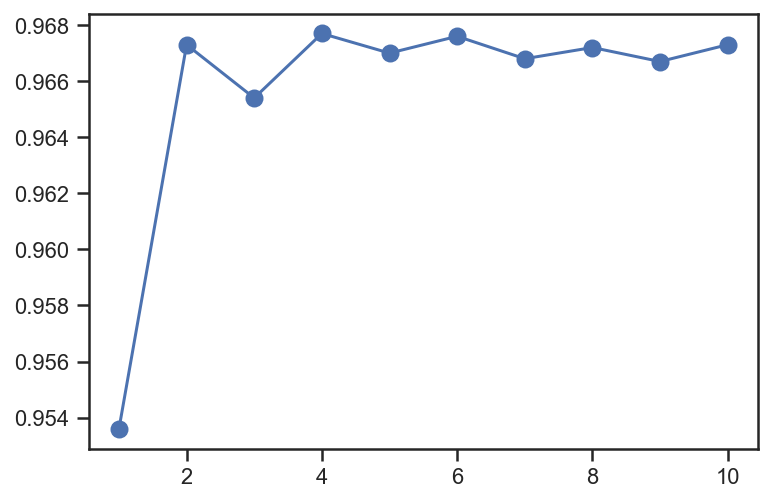

In [9]:
plt.plot(range(1,len(result)+1), result, '-o', markersize = 8)